# Cox Ross Rubinstein

Option pricing model for american option style, assuming stocks who follows an Geometric Brownian Motion and the risk neutrality assumption is True, so the fair price is the future price in the present value by the risk free discount rate

By: Guilherme Regueira

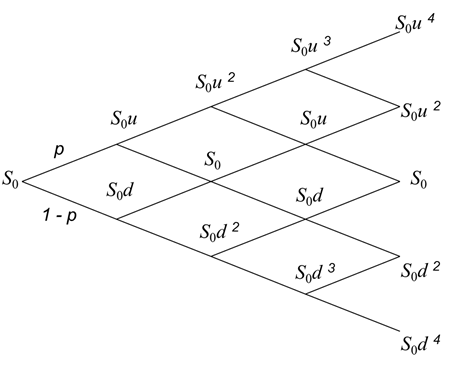

# 1.0 Import Libraries

In [2]:
import math
import numpy as np

# 2.0 Binomial Tree

We need to build the final column of the tree to go back and find the price at the instant zero

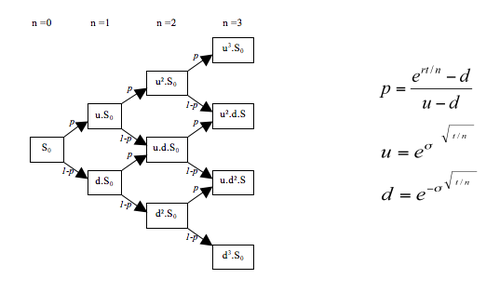

The Cox Ross Rubinstein assumes that the tree is recombinant, if the underlying  asset moves up and moves down the price will be the same as if it had moved down and up. The up factor and down factor can be achieved by

$${\displaystyle u=e^{\sigma {\sqrt {\Delta }}t}}$$
$${\displaystyle d=e^{-\sigma {\sqrt {\Delta }}t}={\frac {1}{u}}.}$$

We dont need to build all the tree we just need to find the values in the last column, so there is a general formula to determine the stock value in each node that I want

$${\displaystyle S_{n}=S_{0}\times u^{N_{u}-N_{d}},}$$

So the option price in each node can be achieved by: 

$$
{\displaystyle C_{t-\Delta t,i}=e^{-r\Delta t}(pC_{t,i}+(1-p)C_{t,i+1})\,}
$$

In [83]:
def model(Spot,Strike,Volatility,Years_to_Expiration,Risk_Free,steps,tipo):
    # parameters:
    dt=Years_to_Expiration/steps # time passes by each node
    u=math.exp(Volatility*math.sqrt(dt)) # up factor by each node
    d=1/u  # down factor by each node
    #-=-=-=-=--=-=-=-=-=-=-=-=
    # Going into the three
    path=np.zeros(steps+1) # creating my final column of values
    for i in range(steps+1):
        path[i]=Spot*u**i*d**(steps-i) # general formula to find the price of each node in the final column
    path_2=np.zeros(steps+1) # creating another numpy array
    for j in range(steps+1): # try to fix the value of a option in the day of exercise
        if tipo=="P":
            path_2[j]=max(0,Strike-path[j]) # General put payoff at exercise day
        else:
            path_2[j]=max(0,path[j]-Strike)  # general Call Payoff at exercise day
    #-=-=-=-=-=-=-=-=-=-=-=-=-==--=
    # Going back in the three
    q=(np.exp(Risk_Free*dt)-d)/(u-d)
    discount_rate=math.exp(-Risk_Free*dt) # risk free discount rate assumption
    for i in np.arange(steps-1,-1,-1): # going back at each node
        for j in range(0,i+1):
            S=Spot*u**j*d**(i-j) # formula for price in each node
            path_2[j]=discount_rate*(q*path_2[j+1]+(1-q)*path_2[j])
            if tipo=="P":
                path_2[j]=max(path_2[j],Strike-Spot)
            else:
                path_2[j]=max(path_2[j],Spot-Strike)
    return path_2[0]

# 3.0 Implementation & Parameters

In [86]:
# Parameters
Stock_Price=20
Strike_Price=21
Stock_Volatility=0.3
Years_to_Expiration=1
Risk_Free_Rate=0.04
Steps_in_the_three=100
Option_Type="C"

# 4.0 Results

In [92]:
x=model(Stock_Price,Strike_Price,Stock_Volatility,Years_to_Expiration,Risk_Free_Rate,Steps_in_the_three,Option_Type)
print(f"Price: ${x:.2f}")

Price: $2.31
